# Datascience Group Project

In [1]:
# The source from which all knowledge comes:

# Labour force characteristics, annual
# https://open.canada.ca/data/en/dataset/621006f5-bc1b-4893-be77-ac5a6de35f0a
gov_site = 'https://www150.statcan.gc.ca/n1/tbl/csv/14100391-eng.zip'


# Labour force characteristics by sex and detailed age group, monthly, unadjusted for seasonality
# https://open.canada.ca/data/en/dataset/17b836c1-e7ec-48b9-b7a3-f370f1006975
gov_site_2= "https://www150.statcan.gc.ca/n1/tbl/csv/14100017-eng.zip"

In [2]:
# Run This if you want to download and extract the data 
import zipfile, io
import requests
import warnings
warnings.filterwarnings("ignore")

# This is for the annual characteristics
r = requests.get(gov_site, verify=False, )
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("./rawcsv")

r = requests.get(gov_site_2, verify=False, )
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("./rawcsv_sex_age")

In [3]:
# # This only needs to be done if we want to download the zipped file (uncomment if you want to experiment)
# # https://requests.readthedocs.io/en/master/user/quickstart/#raw-response-content
# # Download the raw csv zipped
# with open("rawzippedcsv.zip", 'wb') as fd:
#     for chunk in r.iter_content(chunk_size=128):
#         fd.write(chunk)


## Step two read the csv file into pandas 


In [4]:
import pandas as pd
import numpy as np

employment_data = pd.read_csv('./rawcsv/14100391.csv', sep=',')

employment_data.head(10)

,REF_DATE,GEO,DGUID,Labour force characteristics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Population,Persons,249,thousands,3,v1235071748,1.1,26.3,NaN,NaN,NaN,1
1,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Labour force,Persons,249,thousands,3,v1235071749,1.2,16.9,NaN,NaN,NaN,1
2,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Employment,Persons,249,thousands,3,v1235071750,1.3,14.5,NaN,NaN,NaN,1
3,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Unemployment,Persons,249,thousands,3,v1235071751,1.4,2.4,NaN,NaN,NaN,1
4,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Not in labour force,Persons,249,thousands,3,v1235071752,1.5,9.4,NaN,NaN,NaN,1
5,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Unemployment rate,Percentage,242,units,0,v1235071753,1.6,14.2,NaN,NaN,NaN,1
6,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Participation rate,Percentage,242,units,0,v1235071754,1.7,64.3,NaN,NaN,NaN,1
7,2006,"Corner Brook, Newfoundland and Labrador",2016S0504015,Employment rate,Percentage,242,units,0,v1235071755,1.8,55.1,NaN,NaN,NaN,1
8,2006,"Charlottetown, Prince Edward Island",2016S0504105,Population,Persons,249,thousands,3,v1235071756,2.1,50.2,NaN,NaN,NaN,1
9,2006,"Charlottetown, Prince Edward Island",2016S0504105,Labour force,Persons,249,thousands,3,v1235071757,2.2,35.4,NaN,NaN,NaN,1


In [5]:
employment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REF_DATE                      3480 non-null   int64  
 1   GEO                           3480 non-null   object 
 2   DGUID                         3360 non-null   object 
 3   Labour force characteristics  3480 non-null   object 
 4   UOM                           3480 non-null   object 
 5   UOM_ID                        3480 non-null   int64  
 6   SCALAR_FACTOR                 3480 non-null   object 
 7   SCALAR_ID                     3480 non-null   int64  
 8   VECTOR                        3480 non-null   object 
 9   COORDINATE                    3480 non-null   float64
 10  VALUE                         3434 non-null   float64
 11  STATUS                        46 non-null     object 
 12  SYMBOL                        0 non-null      float64
 13  TER

In [6]:
employment_data['REF_DATE'].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020])

In [7]:
employment_data['Labour force characteristics'].unique()

array(['Population', 'Labour force', 'Employment', 'Unemployment',
       'Not in labour force', 'Unemployment rate', 'Participation rate',
       'Employment rate'], dtype=object)

## Sex and age breakdow


In [8]:
employment_data_sex_age = pd.read_csv('./rawcsv_sex_age/14100017.csv', sep=',')


employment_data_sex_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934920 entries, 0 to 3934919
Data columns (total 17 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   REF_DATE                      object 
 1   GEO                           object 
 2   DGUID                         object 
 3   Labour force characteristics  object 
 4   Sex                           object 
 5   Age group                     object 
 6   UOM                           object 
 7   UOM_ID                        int64  
 8   SCALAR_FACTOR                 object 
 9   SCALAR_ID                     int64  
 10  VECTOR                        object 
 11  COORDINATE                    object 
 12  VALUE                         float64
 13  STATUS                        object 
 14  SYMBOL                        float64
 15  TERMINATED                    float64
 16  DECIMALS                      int64  
dtypes: float64(3), int64(3), object(11)
memory usage: 510.4+ MB


In [12]:
employment_data_sex_age.head()


,REF_DATE,GEO,DGUID,Labour force characteristics,Sex,Age group,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1976-01,Canada,2016A000011124,Population,Both sexes,15 years and over,Persons,249,thousands,3,v2091030,1.1.1.1,16852.4,NaN,NaN,NaN,1
1,1976-01,Canada,2016A000011124,Population,Both sexes,15 to 24 years,Persons,249,thousands,3,v2091031,1.1.1.2,4509.9,NaN,NaN,NaN,1
2,1976-01,Canada,2016A000011124,Population,Both sexes,25 years and over,Persons,249,thousands,3,v2091032,1.1.1.3,12342.5,NaN,NaN,NaN,1
3,1976-01,Canada,2016A000011124,Population,Both sexes,25 to 44 years,Persons,249,thousands,3,v2091033,1.1.1.4,6162.4,NaN,NaN,NaN,1
4,1976-01,Canada,2016A000011124,Population,Both sexes,45 to 64 years,Persons,249,thousands,3,v19650582,1.1.1.22,4343.6,NaN,NaN,NaN,1


In [9]:
employment_data_sex_age['GEO'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia'], dtype=object)

In [10]:
employment_data_sex_age['Labour force characteristics'].unique()

array(['Population', 'Labour force', 'Employment', 'Full-time employment',
       'Part-time employment', 'Unemployment', 'Not in labour force',
       'Unemployment rate', 'Participation rate', 'Employment rate'],
      dtype=object)

## Task 1

Unpack the data of employment_data_sex_age so that `Labour force characteristics` are column headers

## Task 2

Try and get this code from github.

## Task 3 

use seaborn to make some rough plots

- unemployment % male, female, (other?) graph as a function of time
- graph of unemployment as a function of time for provinces
- unemployment by industry male female  


Data processing notes:
- Add unitis to the column names so we know what are %'s and what are 'thousands of people'

Mention confounding factors (Jon believes industry is a big one) Confounding factors and how we deal with them will be pretty critical.

# Processing the data

## Processing the geographic data.

Using the employment dataframe, we want to generate a new table with following colums
'Ref_Date', 'GEO', 'Population', 'Labour force', 'Employment', 'Unemployment',
       'Not in labour force', 'Unemployment rate', 'Participation rate',
       'Employment rate'
       
The field in the table will be 'value'

In [12]:
# Make sure the scale factor doesn't change
employment_data['SCALAR_FACTOR'].unique()

array(['thousands', 'units'], dtype=object)

In [13]:
#Make a slice the dataframe to the 3 columns of interes
simple_employment_data=employment_data[['REF_DATE','GEO','Labour force characteristics','VALUE']]
simple_employment_data

,REF_DATE,GEO,Labour force characteristics,VALUE
0,2006,"Corner Brook, Newfoundland and Labrador",Population,26.3
1,2006,"Corner Brook, Newfoundland and Labrador",Labour force,16.9
2,2006,"Corner Brook, Newfoundland and Labrador",Employment,14.5
3,2006,"Corner Brook, Newfoundland and Labrador",Unemployment,2.4
4,2006,"Corner Brook, Newfoundland and Labrador",Not in labour force,9.4
...,...,...,...,...
3475,2020,"Prince George, British Columbia",Unemployment,5.1
3476,2020,"Prince George, British Columbia",Not in labour force,25.3
3477,2020,"Prince George, British Columbia",Unemployment rate,9.3
3478,2020,"Prince George, British Columbia",Participation rate,68.5


In [14]:
# Pivoting the table kept giving and error, turns out we needed two keys to be able to pivot the data.
simple_employment_data[simple_employment_data['GEO']=='Corner Brook, Newfoundland and Labrador'].count()

REF_DATE                        120
GEO                             120
Labour force characteristics    120
VALUE                           120
dtype: int64

In [15]:
simple_employment_data.pivot(index=['REF_DATE','GEO'], columns='Labour force characteristics', values='VALUE')

Labour force characteristics                  Employment  Employment rate  \
REF_DATE GEO                                                                
2006     Bathurst, New Brunswick                    12.9             46.6   
         Brandon, Manitoba                          26.9             63.3   
         Cape Breton, Nova Scotia                   41.9             46.6   
         Charlottetown, Prince Edward Island        32.7             65.1   
         Chatham-Kent, Ontario                      57.7             63.6   
...                                                  ...              ...   
2020     Sault Ste. Marie, Ontario                  37.9             56.2   
         Summerside, Prince Edward Island            8.1             53.6   
         Timmins, Ontario                           24.0             63.5   
         Truro, Nova Scotia                         20.7             52.5   
         Wood Buffalo, Alberta                      44.0             73.2   

Labour force characteristics                  Labour force  \
REF_DATE GEO                                                 
2006     Bathurst, New Brunswick                      14.8   
         Brandon, Manitoba                            28.3   
         Cape Breton, Nova Scotia                     48.3   
         Charlottetown, Prince Edward Island          35.4   
         Chatham-Kent, Ontario                        62.5   
...                                                    ...   
2020     Sault Ste. Marie, Ontario                    41.0   
         Summerside, Prince Edward Island              8.9   
         Timmins, Ontario                             25.4   
         Truro, Nova Scotia                           22.7   
         Wood Buffalo, Alberta                        48.1   

Labour force characteristics                  Not in labour force  \
REF_DATE GEO                                                        
2006     Bathurst, New Brunswick                             12.9   
         Brandon, Manitoba                                   14.2   
         Cape Breton, Nova Scotia                            41.7   
         Charlottetown, Prince Edward Island                 14.9   
         Chatham-Kent, Ontario                               28.2   
...                                                           ...   
2020     Sault Ste. Marie, Ontario                           26.3   
         Summerside, Prince Edward Island                     6.1   
         Timmins, Ontario                                    12.4   
         Truro, Nova Scotia                                  16.7   
         Wood Buffalo, Alberta                               12.0   

Labour force characteristics                  Participation rate  Population  \
REF_DATE GEO                                                                   
2006     Bathurst, New Brunswick                            53.4        27.7   
         Brandon, Manitoba                                  66.6        42.5   
         Cape Breton, Nova Scotia                           53.7        90.0   
         Charlottetown, Prince Edward Island                70.5        50.2   
         Chatham-Kent, Ontario                              68.9        90.7   
...                                                          ...         ...   
2020     Sault Ste. Marie, Ontario                          60.8        67.4   
         Summerside, Prince Edward Island                   58.9        15.1   
         Timmins, Ontario                                   67.2        37.8   
         Truro, Nova Scotia                                 57.6        39.4   
         Wood Buffalo, Alberta                              80.0        60.1   

Labour force characteristics                  Unemployment  Unemployment rate  
REF_DATE GEO                                                                   
2006     Bathurst, New Brunswick                       1.8               12.2  
         Bra

## Processing the age and sex data

This will be messier, I beleive that pivoting will require multiple keys.  These keys are:
- REF_DATE
- GEO (I believe the DGUID is redundant to this)
- Labour force characteristics
- Sex
- Age group

The value of interest will be the `VALUE` collumn.  The units of these values depend entirely on the `Labour force characteristics` column.


In [16]:
simple_employment_data_age_sex=employment_data_sex_age[['REF_DATE','GEO','Labour force characteristics','Sex','Age group','VALUE']]


In [18]:
pivoted_age_sex=simple_employment_data_age_sex.pivot(index=['REF_DATE','GEO','Sex','Age group'], columns='Labour force characteristics', values='VALUE')

In [21]:
simple_employment_data_age_sex[(simple_employment_data_age_sex['Sex']=='Males')
                               & (simple_employment_data_age_sex['GEO']=='Ontario')
                              & (simple_employment_data_age_sex['REF_DATE']== '2019-01')]

simple_employment_data_age_sex

,REF_DATE,GEO,Labour force characteristics,Sex,Age group,VALUE
0,1976-01,Canada,Population,Both sexes,15 years and over,16852.4
1,1976-01,Canada,Population,Both sexes,15 to 24 years,4509.9
2,1976-01,Canada,Population,Both sexes,25 years and over,12342.5
3,1976-01,Canada,Population,Both sexes,25 to 44 years,6162.4
4,1976-01,Canada,Population,Both sexes,45 to 64 years,4343.6
...,...,...,...,...,...,...
3934915,2021-02,British Columbia,Employment rate,Females,55 to 59 years,68.5
3934916,2021-02,British Columbia,Employment rate,Females,60 to 64 years,46.8
3934917,2021-02,British Columbia,Employment rate,Females,65 years and over,10.6
3934918,2021-02,British Columbia,Employment rate,Females,65 to 69 years,21.3


## March 20th Meeting results

- Jon walked team through his code
- Team comisorated over complicated python garbage

### To do's

- Find the stat's canada data and occupation
- Plot something (anything, just get comfortable with the code)

# My Work

In [22]:
employment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480 entries, 0 to 3479
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   REF_DATE                      3480 non-null   int64  
 1   GEO                           3480 non-null   object 
 2   DGUID                         3360 non-null   object 
 3   Labour force characteristics  3480 non-null   object 
 4   UOM                           3480 non-null   object 
 5   UOM_ID                        3480 non-null   int64  
 6   SCALAR_FACTOR                 3480 non-null   object 
 7   SCALAR_ID                     3480 non-null   int64  
 8   VECTOR                        3480 non-null   object 
 9   COORDINATE                    3480 non-null   float64
 10  VALUE                         3434 non-null   float64
 11  STATUS                        46 non-null     object 
 12  SYMBOL                        0 non-null      float64
 13  TER

In [23]:
employment_data_sex_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3934920 entries, 0 to 3934919
Data columns (total 17 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   REF_DATE                      object 
 1   GEO                           object 
 2   DGUID                         object 
 3   Labour force characteristics  object 
 4   Sex                           object 
 5   Age group                     object 
 6   UOM                           object 
 7   UOM_ID                        int64  
 8   SCALAR_FACTOR                 object 
 9   SCALAR_ID                     int64  
 10  VECTOR                        object 
 11  COORDINATE                    object 
 12  VALUE                         float64
 13  STATUS                        object 
 14  SYMBOL                        float64
 15  TERMINATED                    float64
 16  DECIMALS                      int64  
dtypes: float64(3), int64(3), object(11)
memory usage: 510.4+ MB


In [24]:
employment_data.isnull().sum()

REF_DATE                           0
GEO                                0
DGUID                            120
Labour force characteristics       0
UOM                                0
UOM_ID                             0
SCALAR_FACTOR                      0
SCALAR_ID                          0
VECTOR                             0
COORDINATE                         0
VALUE                             46
STATUS                          3434
SYMBOL                          3480
TERMINATED                      3480
DECIMALS                           0
dtype: int64

In [25]:
employment_data.VALUE.value_counts(dropna=False)

NaN     46
1.9     25
1.8     22
2.3     21
6.1     17
        ..
78.4     1
47.2     1
84.2     1
83.9     1
33.8     1
Name: VALUE, Length: 821, dtype: int64

In [26]:
employment_data["VALUE"].fillna(employment_data["VALUE"].mean(), inplace=False)

0       26.3
1       16.9
2       14.5
3        2.4
4        9.4
        ... 
3475     5.1
3476    25.3
3477     9.3
3478    68.5
3479    62.1
Name: VALUE, Length: 3480, dtype: float64

In [34]:
specific_combi = employment_data_sex_age[['GEO','Labour force characteristics', 'VALUE']]


pivoted_table_2 = specific_combi.pivot(columns='GEO', values='VALUE')
pivoted_table_2.head(15)

GEO,Alberta,British Columbia,Canada,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan
0,NaN,NaN,16852.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,4509.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,12342.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,6162.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4343.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,6180.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,8619.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,3723.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,15015.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,2330.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

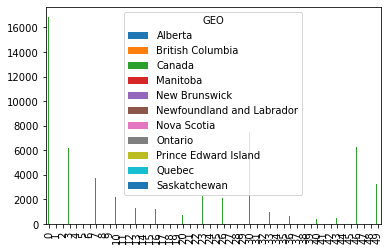

In [35]:
pivoted_table_2.head(50).plot.bar()

In [36]:
specific_plot = simple_employment_data_age_sex[(simple_employment_data_age_sex['Sex']=='Males')
                               & (simple_employment_data_age_sex['GEO']=='Ontario')
                              & (simple_employment_data_age_sex['REF_DATE']== '2019-01')
                              & (simple_employment_data_age_sex['Labour force characteristics'] == 'Unemployment')]


specific_plot.head(15)

,REF_DATE,GEO,Labour force characteristics,Sex,Age group,VALUE
3750472,2019-01,Ontario,Unemployment,Males,15 years and over,266.4
3750473,2019-01,Ontario,Unemployment,Males,15 to 24 years,79.9
3750474,2019-01,Ontario,Unemployment,Males,25 years and over,186.4
3750475,2019-01,Ontario,Unemployment,Males,25 to 44 years,107.8
3750476,2019-01,Ontario,Unemployment,Males,45 to 64 years,70.3
3750477,2019-01,Ontario,Unemployment,Males,45 years and over,78.6
3750478,2019-01,Ontario,Unemployment,Males,25 to 54 years,141.8
3750479,2019-01,Ontario,Unemployment,Males,55 years and over,44.6
3750480,2019-01,Ontario,Unemployment,Males,15 to 64 years,258.0
3750481,2019-01,Ontario,Unemployment,Males,15 to 19 years,29.1


<AxesSubplot:>

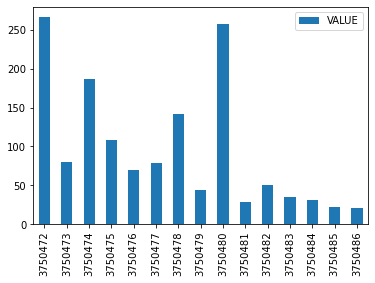

In [37]:
specific_plot.head(15).plot.bar()

In [23]:
pivoted_age_sex.head(30)

Labour force characteristics                   Employment  Employment rate  \
REF_DATE GEO     Sex        Age group                                        
1976-01  Alberta Both sexes 15 to 19 years           85.1             46.4   
                            15 to 24 years          212.3             58.6   
                            15 to 64 years          771.0             66.8   
                            15 years and over       787.8             61.7   
                            20 to 24 years          127.2             71.1   
                            25 to 29 years          117.4             73.5   
                            25 to 44 years          355.7             73.9   
                            25 to 54 years          483.0             73.0   
                            25 years and over       575.5             62.9   
                            30 to 34 years           89.9             73.3   
                            35 to 39 years           76.4             72.5   
                            40 to 44 years           72.0             76.9   
                            45 to 49 years           64.1             70.8   
                            45 to 64 years          203.0             65.3   
                            45 years and over       219.8             50.8   
                            50 to 54 years           63.1             70.4   
                            55 to 59 years           45.8             64.7   
                            55 years and over        92.6             36.6   
                            60 to 64 years           29.9             49.8   
                            65 to 69 years           10.3             22.1   
                            65 years and over        16.8             13.8   
                            70 years and over         6.5              8.6   
                 Females    15 to 19 years           40.1             44.5   
                            15 to 24 years           96.1             53.7   
                            15 to 64 years          294.2             51.5   
                            15 years and over       298.3             47.1   
                            20 to 24 years           56.0             63.1   
                            25 to 29 years           46.0             58.4   
                            25 to 44 years          129.5             54.7   
                            25 to 54 years          172.6             53.0   

Labour force characteristics                   Full-time employment  \
REF_DATE GEO     Sex        Age group                                 
1976-01  Alberta Both sexes 15 to 19 years                     41.8   
                            15 to 24 years                    152.3   
                            15 to 64 years                    642.7   
                            15 years and over                 653.3   
                            20 to 24 years                    110.5   
                            25 to 29 years                    106.0   
                            25 to 44 years                    315.6   
                            25 to 54 years                    427.5   
                            25 years and over                 501.0   
                            30 to 34 years                     79.6   
                            35 to 39 years                     66.8   
                            40 to 44 years                     63.2   
                            45 to 49 years                     56.0   
                            45 to 64 years                    174.8   
                            45 years and over                 185.4   
                            50 to 54 years                     56.0   
                            55 to 59 years                     39.1   
                            55 years and over                  73.5   
                            60 to 64 years                     23.8   
            

In [29]:
pivoted_age_sex[(pivoted_age_sex['GEO']=='Alberta')]

KeyError: 'GEO'